In [1]:
import cv2 as cv
import glob
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import statistics
import re
import tqdm

In [2]:
# path = "/home/schnablelab/Documents/ImageDataset/RGB_satellite/Crawfordsville/Hybrids/TP1/"
# TP="TP2"
# print(path) 
def RGB(path):
    all_files=glob.glob(os.path.join(path, '*.PNG'))
    print(len(all_files))
    Color=[]
    for files in all_files:
        img=cv.imread(files)
        img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R=[]
        G=[]
        B=[]
        h=img.shape[0]
        w=img.shape[1]
        Image=os.path.basename(files).split('.')[0]
        for height in range(h):
            # print(height)
            for width in range(w):
                # print(height, width)
                r,g,b = img[height, width]
                GLI=(2*g-r-b)/(2*g+r+b)
                
                
                NGRDIupper=r.astype(float)-g.astype(float)
                NGRDIlower=g.astype(float)+r.astype(float)
                NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))
                
                GRVIupper=g.astype(float)-r.astype(float)
                GRVIlower=g.astype(float)+r.astype(float)
                GRVI=(GRVIupper.astype(float)/GRVIlower.astype(float))
                # print(r,g,b,GLI,NGRDI)
#                 print(type(r),type(g),type(b),type(GLI),type(NGRDI))
            

                Color.append(
                    {'file':Image,
                     'Red':r,
                     'Green':g,
                     'Blue':b,
                     'GLI':GLI,
                     'NGRDI':NGRDI,
                     'GRVI':GRVI
                    }
                )
    RGB_values=pd.DataFrame(Color)
    return RGB_values

In [3]:
RGBvalues_satellite=RGB('/home/schnablelab/Documents/ImageDataset/RGB_UAV/Ames/Hybrids/TP2')
path1="/home/schnablelab/Documents/ImageDataset/Outlier/Ames_uav_TP2.png"
path2="/home/schnablelab/Documents/ImageDataset/Outlier/Ames_uav_TP2_after.png"

672


/tmp/ipykernel_89546/1839899511.py:22: RuntimeWarning: invalid value encountered in scalar divide
  GLI=(2*g-r-b)/(2*g+r+b)
/tmp/ipykernel_89546/1839899511.py:27: RuntimeWarning: invalid value encountered in scalar divide
  NGRDI=(NGRDIupper.astype(float)/NGRDIlower.astype(float))
/tmp/ipykernel_89546/1839899511.py:31: RuntimeWarning: invalid value encountered in scalar divide
  GRVI=(GRVIupper.astype(float)/GRVIlower.astype(float))


In [4]:
RGBvalues_satellite.shape

(187791808, 7)

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Nimbus Sans",
    'font.size':40,
    'axes.linewidth':2,
    'xtick.major.size':4,
    'ytick.major.size':4,
    'xtick.major.width':2,
    'ytick.major.width':2
})

/tmp/ipykernel_89546/2391669303.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([int(x) for x in xticks])
/tmp/ipykernel_89546/2391669303.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(y) for y in yticks])


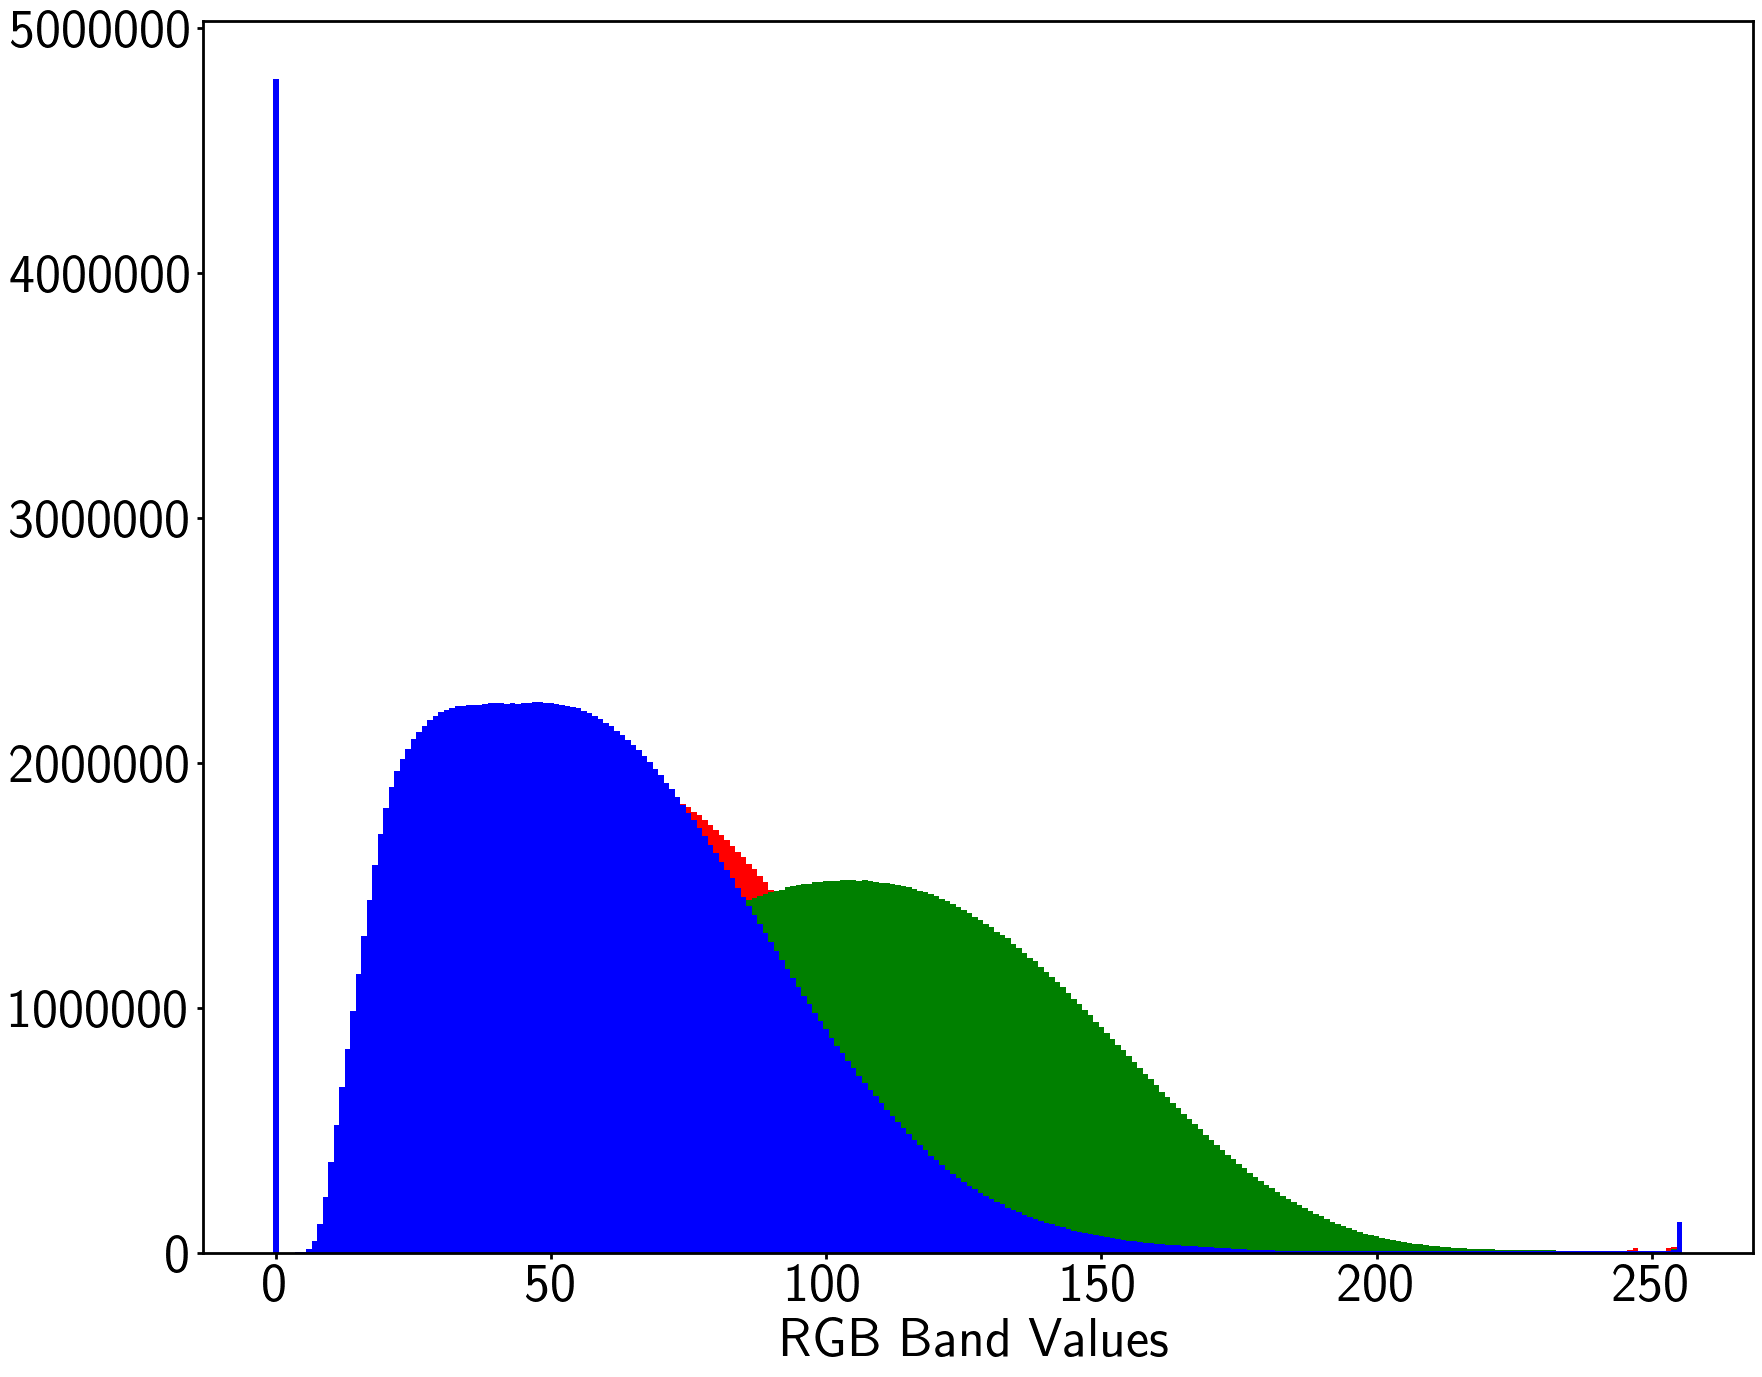

In [8]:
fig=plt.figure(figsize=(20,16))
plt.hist(RGBvalues_satellite["Red"], bins=range(min(RGBvalues_satellite["Red"]), max(RGBvalues_satellite["Red"]) + 2),align='left', rwidth=100, color='red')

plt.hist(RGBvalues_satellite["Green"], bins=range(min(RGBvalues_satellite["Green"]), max(RGBvalues_satellite["Green"]) + 2),align='left', rwidth=100, color='green')

plt.hist(RGBvalues_satellite["Blue"], bins=range(min(RGBvalues_satellite["Blue"]), max(RGBvalues_satellite["Blue"]) + 2),align='left', rwidth=100, color='blue')

ax2=plt.gca()
xticks=ax2.get_xticks()
yticks=ax2.get_yticks()

# ax2.set_xticks(xticks)
ax2.set_xticklabels([int(x) for x in xticks])
ax2.set_yticklabels([int(y) for y in yticks])
plt.xlabel('RGB Band Values')
# plt.set_xticks(xticks)
# plt.set_xticklabels([x for x in xticks])
# plt.set_yticklabels([y for y in yticks])
# plt.xlabel(f'$R^2$')

plt.savefig(path1, bbox_inches='tight', dpi=350)

plt.show()

In [160]:
# RGBvalues_satellite_red=RGBvalues_satellite.loc[RGBvalues_satellite['Red']>=170,:]

In [161]:
# RGBvalues_satellite_red

In [9]:
RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Blue']>0,:]
RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Red']>0,:]
RGBvalues_satellite.shape

(182999465, 7)

In [13]:
RGBvalues_satellite=RGBvalues_satellite.loc[RGBvalues_satellite['Blue']<250,:]
RGBvalues_satellite.shape

(182821362, 7)

/tmp/ipykernel_89546/3467620881.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([int(x) for x in xticks])
/tmp/ipykernel_89546/3467620881.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(y) for y in yticks])


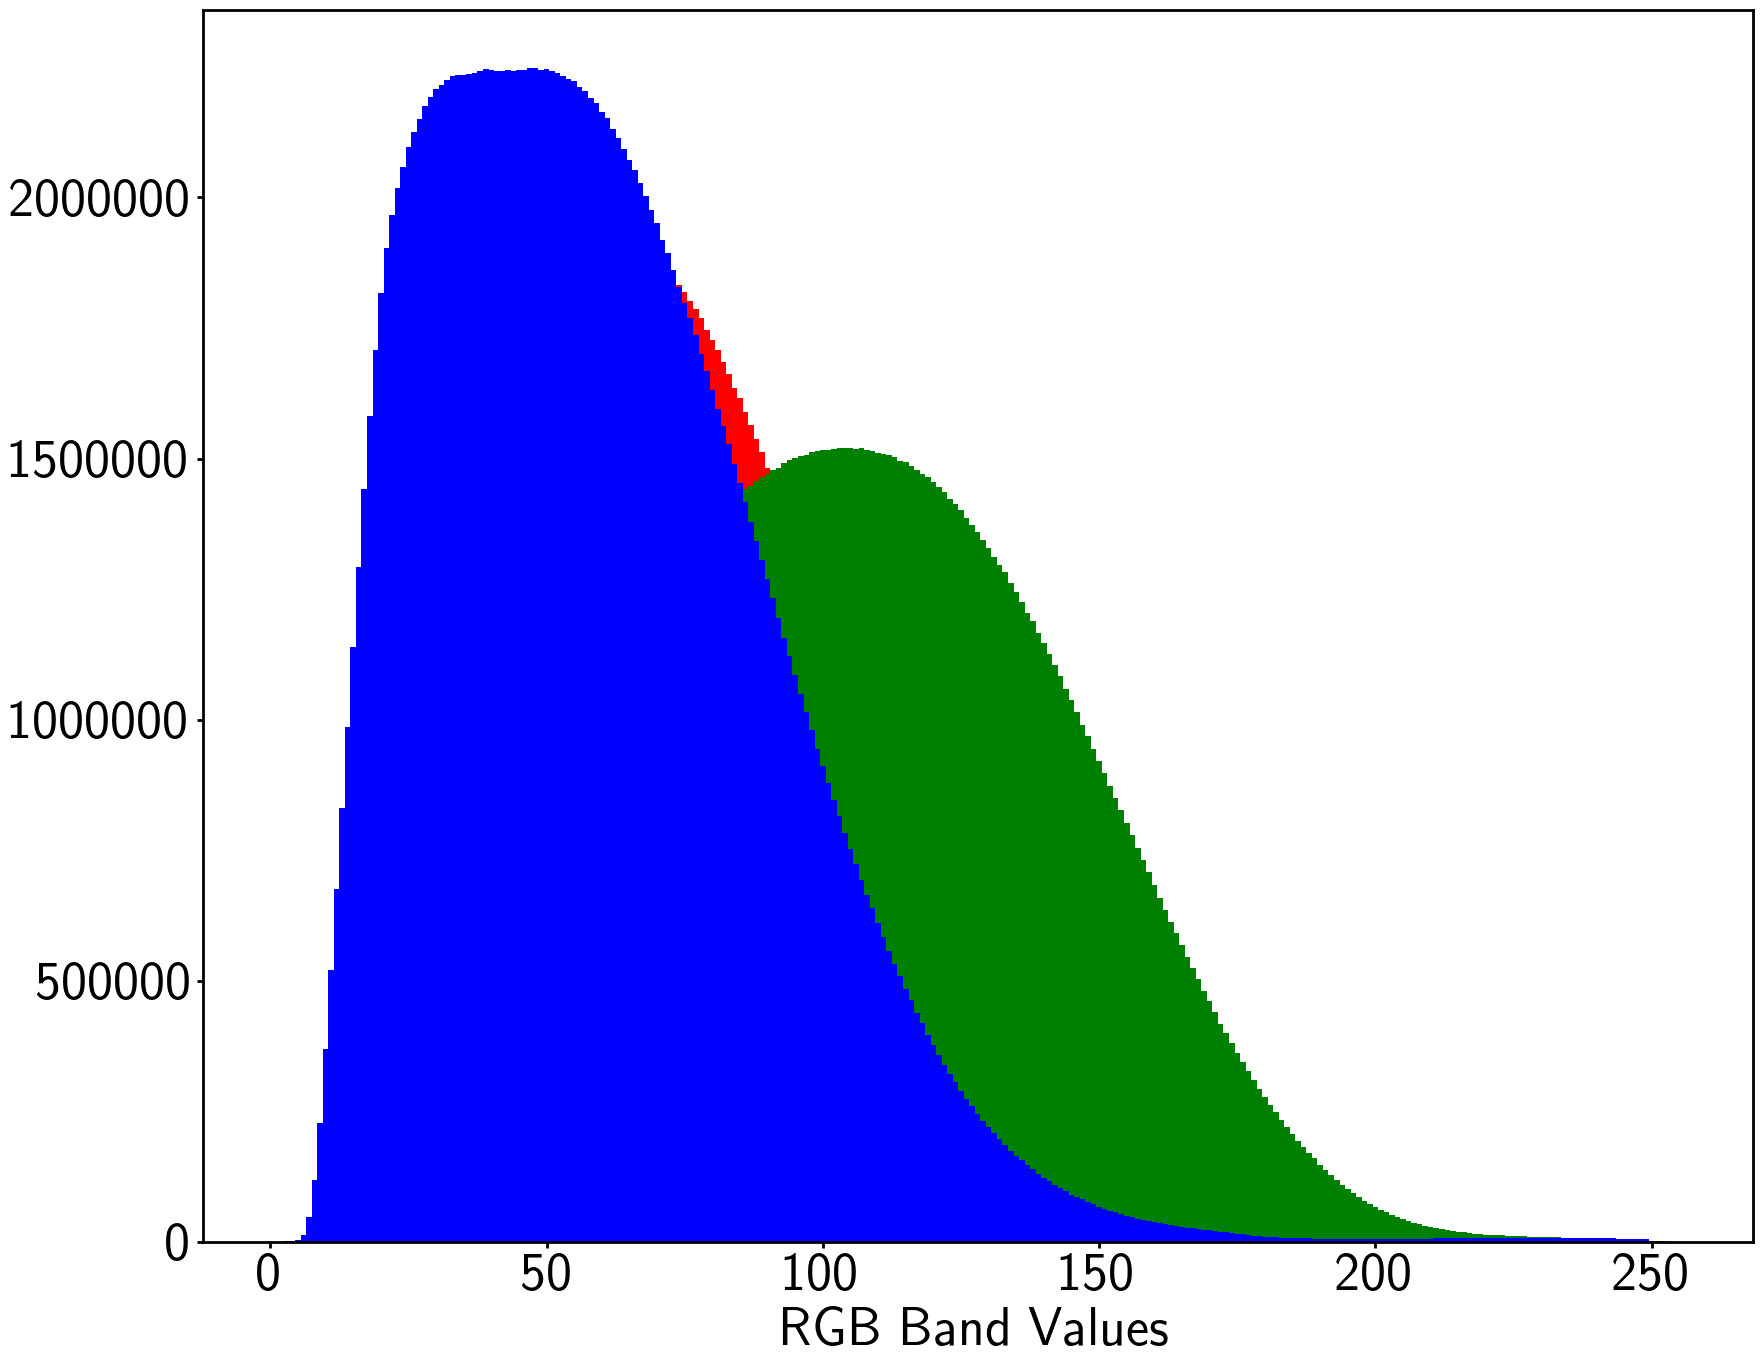

In [15]:
fig=plt.figure(figsize=(20,16))

plt.hist(RGBvalues_satellite["Red"], bins=range(min(RGBvalues_satellite["Red"]), max(RGBvalues_satellite["Red"]) + 2),align='left', rwidth=100,color='red')
plt.hist(RGBvalues_satellite["Green"], bins=range(min(RGBvalues_satellite["Green"]), max(RGBvalues_satellite["Green"]) + 2),align='left', rwidth=100, color='green')
plt.hist(RGBvalues_satellite["Blue"], bins=range(min(RGBvalues_satellite["Blue"]), max(RGBvalues_satellite["Blue"]) + 2),align='left', rwidth=100,color='blue')
ax2=plt.gca()
xticks=ax2.get_xticks()
yticks=ax2.get_yticks()

# ax2.set_xticks(xticks)
ax2.set_xticklabels([int(x) for x in xticks])
ax2.set_yticklabels([int(y) for y in yticks])
plt.xlabel('RGB Band Values')
plt.savefig(path2, bbox_inches='tight', dpi=350)
plt.show()

In [49]:
RGBvalues_satellite

,file,Red,Green,Blue,GLI,NGRDI,GRVI
235,Scottsbluff-TP3-n150_22_12,104,120,104,0.071429,-0.071429,0.071429
236,Scottsbluff-TP3-n150_22_12,111,127,111,0.067227,-0.067227,0.067227
237,Scottsbluff-TP3-n150_22_12,122,137,121,0.059961,-0.057915,0.057915
238,Scottsbluff-TP3-n150_22_12,132,146,130,0.054152,-0.050360,0.050360
239,Scottsbluff-TP3-n150_22_12,137,151,134,0.054101,-0.048611,0.048611
...,...,...,...,...,...,...,...
85654211,Scottsbluff-TP3-n75_25_5,132,144,130,0.047273,-0.043478,0.043478
85654212,Scottsbluff-TP3-n75_25_5,103,116,103,0.059361,-0.059361,0.059361
85654213,Scottsbluff-TP3-n75_25_5,83,96,83,0.072626,-0.072626,0.072626
85654214,Scottsbluff-TP3-n75_25_5,83,98,85,0.076923,-0.082873,0.082873


In [50]:
RGBvalues_satellite.shape

(78847307, 7)

In [51]:
# RGBvalues_satellite=RGBvalues_satellite[['file','GRVI','NGRDI']]

In [52]:
# RGBvalues_satellite=RGBvalues_satellite.groupby('file')[["Red", "Green", "Blue", 'GLI', 'NGRDI']].agg(['mean', 'median', 'sum']).reset_index()
RGBvalues_satellite=RGBvalues_satellite.groupby('file')[list(RGBvalues_satellite.describe().columns)].agg(['mean', 'median', 'sum']).reset_index()
RGBvalues_satellite.columns = RGBvalues_satellite.columns.map('_'.join)
# RGBvalues_satellite.columns=[['file','RedMean', 'RedMedian', 'RedSum','Gr

In [53]:
RGBvalues_satellite.describe()

,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum,GRVI_mean,GRVI_median,GRVI_sum
count,525.000000,525.000000,5.250000e+02,525.000000,525.000000,5.250000e+02,525.000000,525.000000,5.250000e+02,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,142.600246,139.792381,2.141557e+07,153.940055,154.872381,2.311916e+07,139.138358,135.973333,2.089646e+07,0.047323,0.053218,7108.204386,-0.042648,-0.047545,-6407.823157,0.042648,0.047545,6407.823157
std,6.520301,8.752139,9.640328e+05,5.871478,8.154338,8.771857e+05,6.974206,8.526522,1.049386e+06,0.019079,0.019625,2870.070833,0.015202,0.015531,2294.100242,0.015202,0.015531,2294.100242
min,121.374325,113.000000,1.833104e+07,136.789737,131.000000,2.056374e+07,117.482179,110.000000,1.774322e+07,-0.014420,-0.022762,-2157.650726,-0.097911,-0.097643,-14791.676109,-0.009183,-0.019108,-1374.039266
25%,138.731567,135.000000,2.080786e+07,150.215022,150.000000,2.252720e+07,134.626461,131.000000,2.019080e+07,0.033578,0.039275,5046.953551,-0.052196,-0.057471,-7815.075768,0.031936,0.037037,4792.053655
50%,142.541150,140.000000,2.141926e+07,154.322406,155.000000,2.317874e+07,139.488803,136.000000,2.092701e+07,0.045695,0.051724,6850.063120,-0.041306,-0.046358,-6174.932058,0.041306,0.046358,6174.932058
75%,146.897606,145.000000,2.206736e+07,158.061926,161.000000,2.372669e+07,143.921984,142.000000,2.158910e+07,0.061189,0.068010,9158.289485,-0.031936,-0.037037,-4792.053655,0.052196,0.057471,7815.075768
max,162.921032,174.000000,2.437999e+07,168.215853,175.000000,2.524865e+07,159.985450,160.000000,2.403669e+07,0.105748,0.109091,15978.026460,0.009183,0.019108,1374.039266,0.097911,0.097643,14791.676109


In [54]:
RGBvalues_satellite

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum,GRVI_mean,GRVI_median,GRVI_sum
0,Scottsbluff-TP3-n150_10_11,140.440952,134.0,21037212,153.197331,152.0,22948041,138.139939,131.0,20692534,0.050466,0.059644,7559.446341,-0.047883,-0.056769,-7172.544380,0.047883,0.056769,7172.544380
1,Scottsbluff-TP3-n150_10_12,129.142763,119.0,19365603,140.914668,137.0,21130859,129.145390,119.0,19365997,0.045974,0.051887,6894.089716,-0.048018,-0.053691,-7200.608177,0.048018,0.053691,7200.608177
2,Scottsbluff-TP3-n150_10_13,147.873041,145.0,22163655,158.319983,159.0,23729474,144.081183,141.0,21595320,0.043608,0.049600,6536.085853,-0.037942,-0.043902,-5686.886957,0.037942,0.043902,5686.886957
3,Scottsbluff-TP3-n150_10_14,145.366921,141.0,21788757,151.123746,149.0,22651636,146.595912,142.0,21972968,0.017147,0.024081,2570.066568,-0.021844,-0.025641,-3274.182331,0.021844,0.025641,3274.182331
4,Scottsbluff-TP3-n150_10_15,148.759275,147.0,22288751,153.971541,155.0,23069710,144.503614,142.0,21651121,0.025816,0.034325,3868.003099,-0.019889,-0.026667,-2980.002225,0.019889,0.026667,2980.002225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Scottsbluff-TP3-n75_9_3,135.329721,129.0,20342493,143.073152,139.0,21506470,140.493174,134.0,21118653,0.018641,0.022801,2802.023277,-0.034583,-0.033033,-5198.377881,0.034583,0.033033,5198.377881
521,Scottsbluff-TP3-n75_9_4,148.501262,145.0,22365181,158.437393,156.0,23861622,151.567381,147.0,22826957,0.029361,0.032425,4421.939446,-0.036821,-0.037559,-5545.483728,0.036821,0.037559,5545.483728
522,Scottsbluff-TP3-n75_9_5,146.775202,145.0,22067358,149.005201,151.0,22402634,149.150345,145.0,22424456,-0.000727,0.001727,-109.286747,-0.008374,-0.008097,-1258.998651,0.008374,0.008097,1258.998651
523,Scottsbluff-TP3-n75_9_6,134.724362,127.0,20299189,144.959561,139.0,21841347,134.330134,127.0,20239790,0.038147,0.041727,5747.702100,-0.039597,-0.041420,-5966.150386,0.039597,0.041420,5966.150386


In [55]:
RGBvalues_satellite['file_']=RGBvalues_satellite['file_'].replace('V2','',regex=True)

In [56]:
RGBvalues_satellite

,file_,Red_mean,Red_median,Red_sum,Green_mean,Green_median,Green_sum,Blue_mean,Blue_median,Blue_sum,GLI_mean,GLI_median,GLI_sum,NGRDI_mean,NGRDI_median,NGRDI_sum,GRVI_mean,GRVI_median,GRVI_sum
0,Scottsbluff-TP3-n150_10_11,140.440952,134.0,21037212,153.197331,152.0,22948041,138.139939,131.0,20692534,0.050466,0.059644,7559.446341,-0.047883,-0.056769,-7172.544380,0.047883,0.056769,7172.544380
1,Scottsbluff-TP3-n150_10_12,129.142763,119.0,19365603,140.914668,137.0,21130859,129.145390,119.0,19365997,0.045974,0.051887,6894.089716,-0.048018,-0.053691,-7200.608177,0.048018,0.053691,7200.608177
2,Scottsbluff-TP3-n150_10_13,147.873041,145.0,22163655,158.319983,159.0,23729474,144.081183,141.0,21595320,0.043608,0.049600,6536.085853,-0.037942,-0.043902,-5686.886957,0.037942,0.043902,5686.886957
3,Scottsbluff-TP3-n150_10_14,145.366921,141.0,21788757,151.123746,149.0,22651636,146.595912,142.0,21972968,0.017147,0.024081,2570.066568,-0.021844,-0.025641,-3274.182331,0.021844,0.025641,3274.182331
4,Scottsbluff-TP3-n150_10_15,148.759275,147.0,22288751,153.971541,155.0,23069710,144.503614,142.0,21651121,0.025816,0.034325,3868.003099,-0.019889,-0.026667,-2980.002225,0.019889,0.026667,2980.002225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Scottsbluff-TP3-n75_9_3,135.329721,129.0,20342493,143.073152,139.0,21506470,140.493174,134.0,21118653,0.018641,0.022801,2802.023277,-0.034583,-0.033033,-5198.377881,0.034583,0.033033,5198.377881
521,Scottsbluff-TP3-n75_9_4,148.501262,145.0,22365181,158.437393,156.0,23861622,151.567381,147.0,22826957,0.029361,0.032425,4421.939446,-0.036821,-0.037559,-5545.483728,0.036821,0.037559,5545.483728
522,Scottsbluff-TP3-n75_9_5,146.775202,145.0,22067358,149.005201,151.0,22402634,149.150345,145.0,22424456,-0.000727,0.001727,-109.286747,-0.008374,-0.008097,-1258.998651,0.008374,0.008097,1258.998651
523,Scottsbluff-TP3-n75_9_6,134.724362,127.0,20299189,144.959561,139.0,21841347,134.330134,127.0,20239790,0.038147,0.041727,5747.702100,-0.039597,-0.041420,-5966.150386,0.039597,0.041420,5966.150386


In [57]:
# olddf=pd.read_csv("Data/Scottsbluff/Satelliteimages/rgb/RGBvalues_satellite_TP6_afteroutliers.csv")
# olddf=olddf[olddf.columns.drop(list(olddf.filter(regex="NGRDI")))]

In [58]:
# RGBvalues_satellite=pd.merge(RGBvalues_satellite, olddf, left_on="file_", right_on="file_", how="inner")

In [59]:
# RGBvalues_satellite

In [60]:
# RGBvalues_satellite.to_csv("Data/Ames/Satelliteimages/rgb/RGBvalues_satellite_TP6_afteroutliers.csv", index=False)
RGBvalues_satellite.to_csv("Data/Scottsbluff/UAV/RGBuav_TP3.csv", index=False)

In [139]:
# RGBvalues_uav=RGB("Data/Movalley/UAV/RGBuav_TP2.csv")